##### 최소 공통 조상(LCA: lowest common ancestor)
- Lowest Common Ancestor(LCA)는 트리 구조에서 특정한 두 노드의 공통 조상 중 가장 가까운 조상을 뜻한다.
- 희소 테이블을 공부한 적 있다면 매우 유사한 방식으로 진행된다. 
- LCA란 트리상에서 어떤 두 정점 u, v가 있을 때, u이거나 u의 조상이면서 동시에 v거나 v의 조상인 노드들 중 가장 깊은 노드이다
<br><br>
- LCA풀이는 다음의 순서로 진행된다.
    1. dfs로 모든 노드의 깊이, 부모를 체크한다. 여기서 부모는 바로 위 직속 부모를 말한다.
    2. 위의 결과를 이용해서 모든 노드의 2**i번째 부모를 찾아 그 결과를 저장한다.
    3. 두 노드가 주어지면 둘 중 더 깊은 노드를 두 노드의 깊이가 같아질 때까지 거슬러 올려보낸다.
    4. 최상단 노드부터 내려오며 두 노드의 공통 부모를 찾는다.

예를들어, 아래의 트리에서 노드 4와 3의 LCA는 1번 노드이다

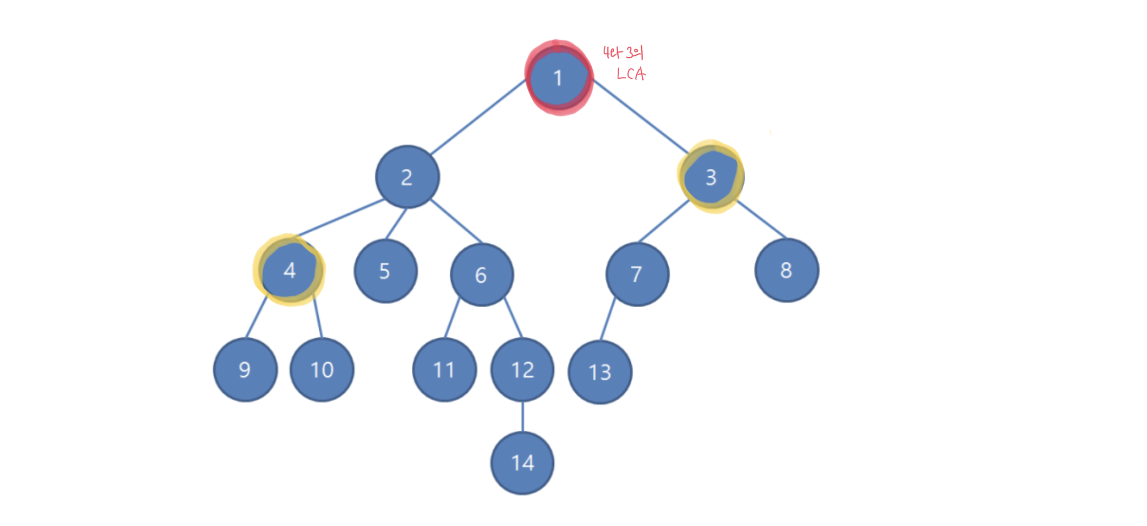

다른 예로는 노드 9, 14의 LCA는 2번 노드이며, 노드 3, 13의 LCA는 3번 노드이다
여기서 한가지 사실을 알 수 있는데 노드 u,v와 이들의 LCA w의 관계이다
<b>u,v의 최단 경로는 u-w-v 형태</b>라는 것이다
이를 아래의 트리에서 빨간 경로로 확인할 수 있다

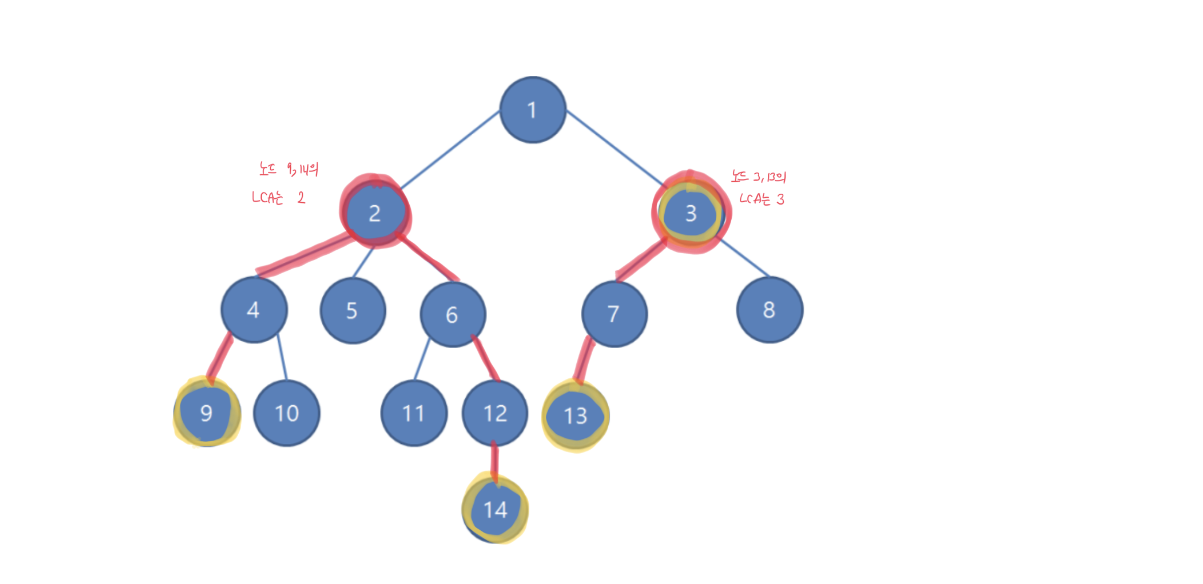

따라서, 트리 문제에서 최단경로를 빠르게 찾길 원한다면 가장먼저 LCA를 생각해봐야 한다

##### LCA 구현 방법
1. 노드 u,v 가 서로 만날때까지 부모노드를 따라서 두 노드를 옮겨 보는 방법 : 선형 탐색
    - 두 노드의 높이가 같은 경우, 가리키는 정점이 같아질 때까지 부모 노드로 거슬러 올라가면 된다

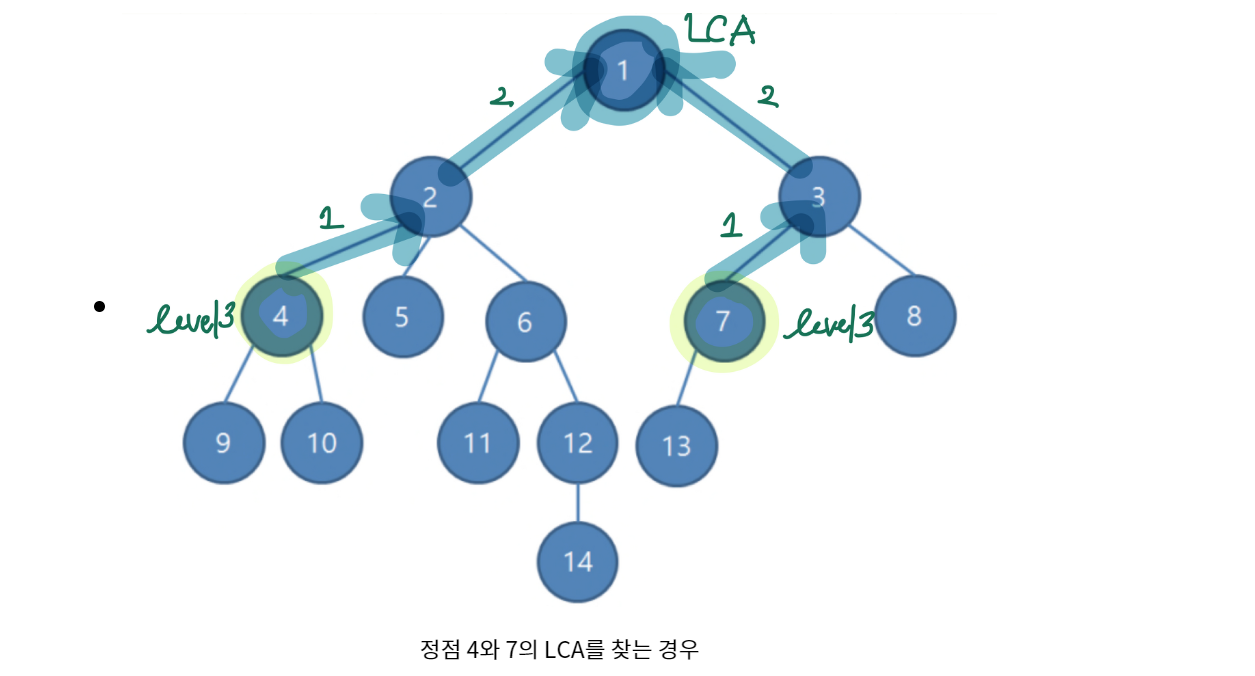


- 두 노드의 높이가 다를 경우, 높이를 맞춰주고 나서 하나씩 올리는 방식으로 최악의 경우 O(N)의 시간을 가진다

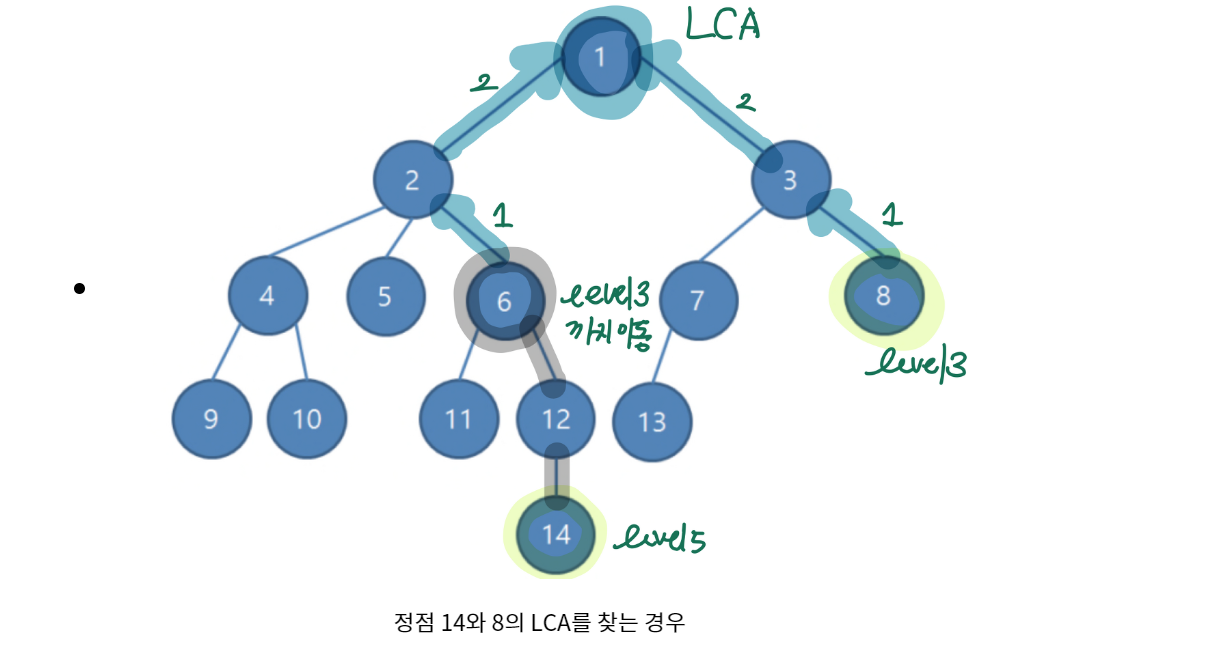

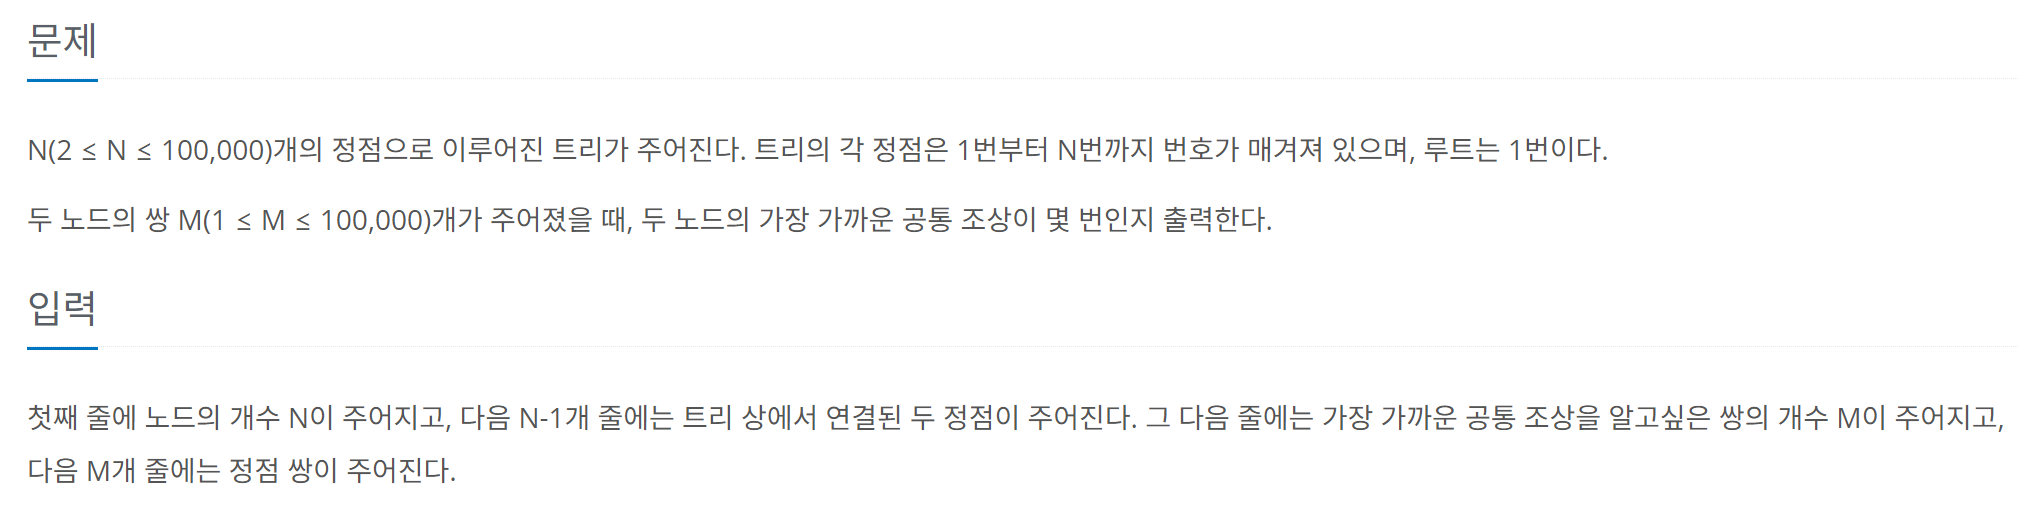

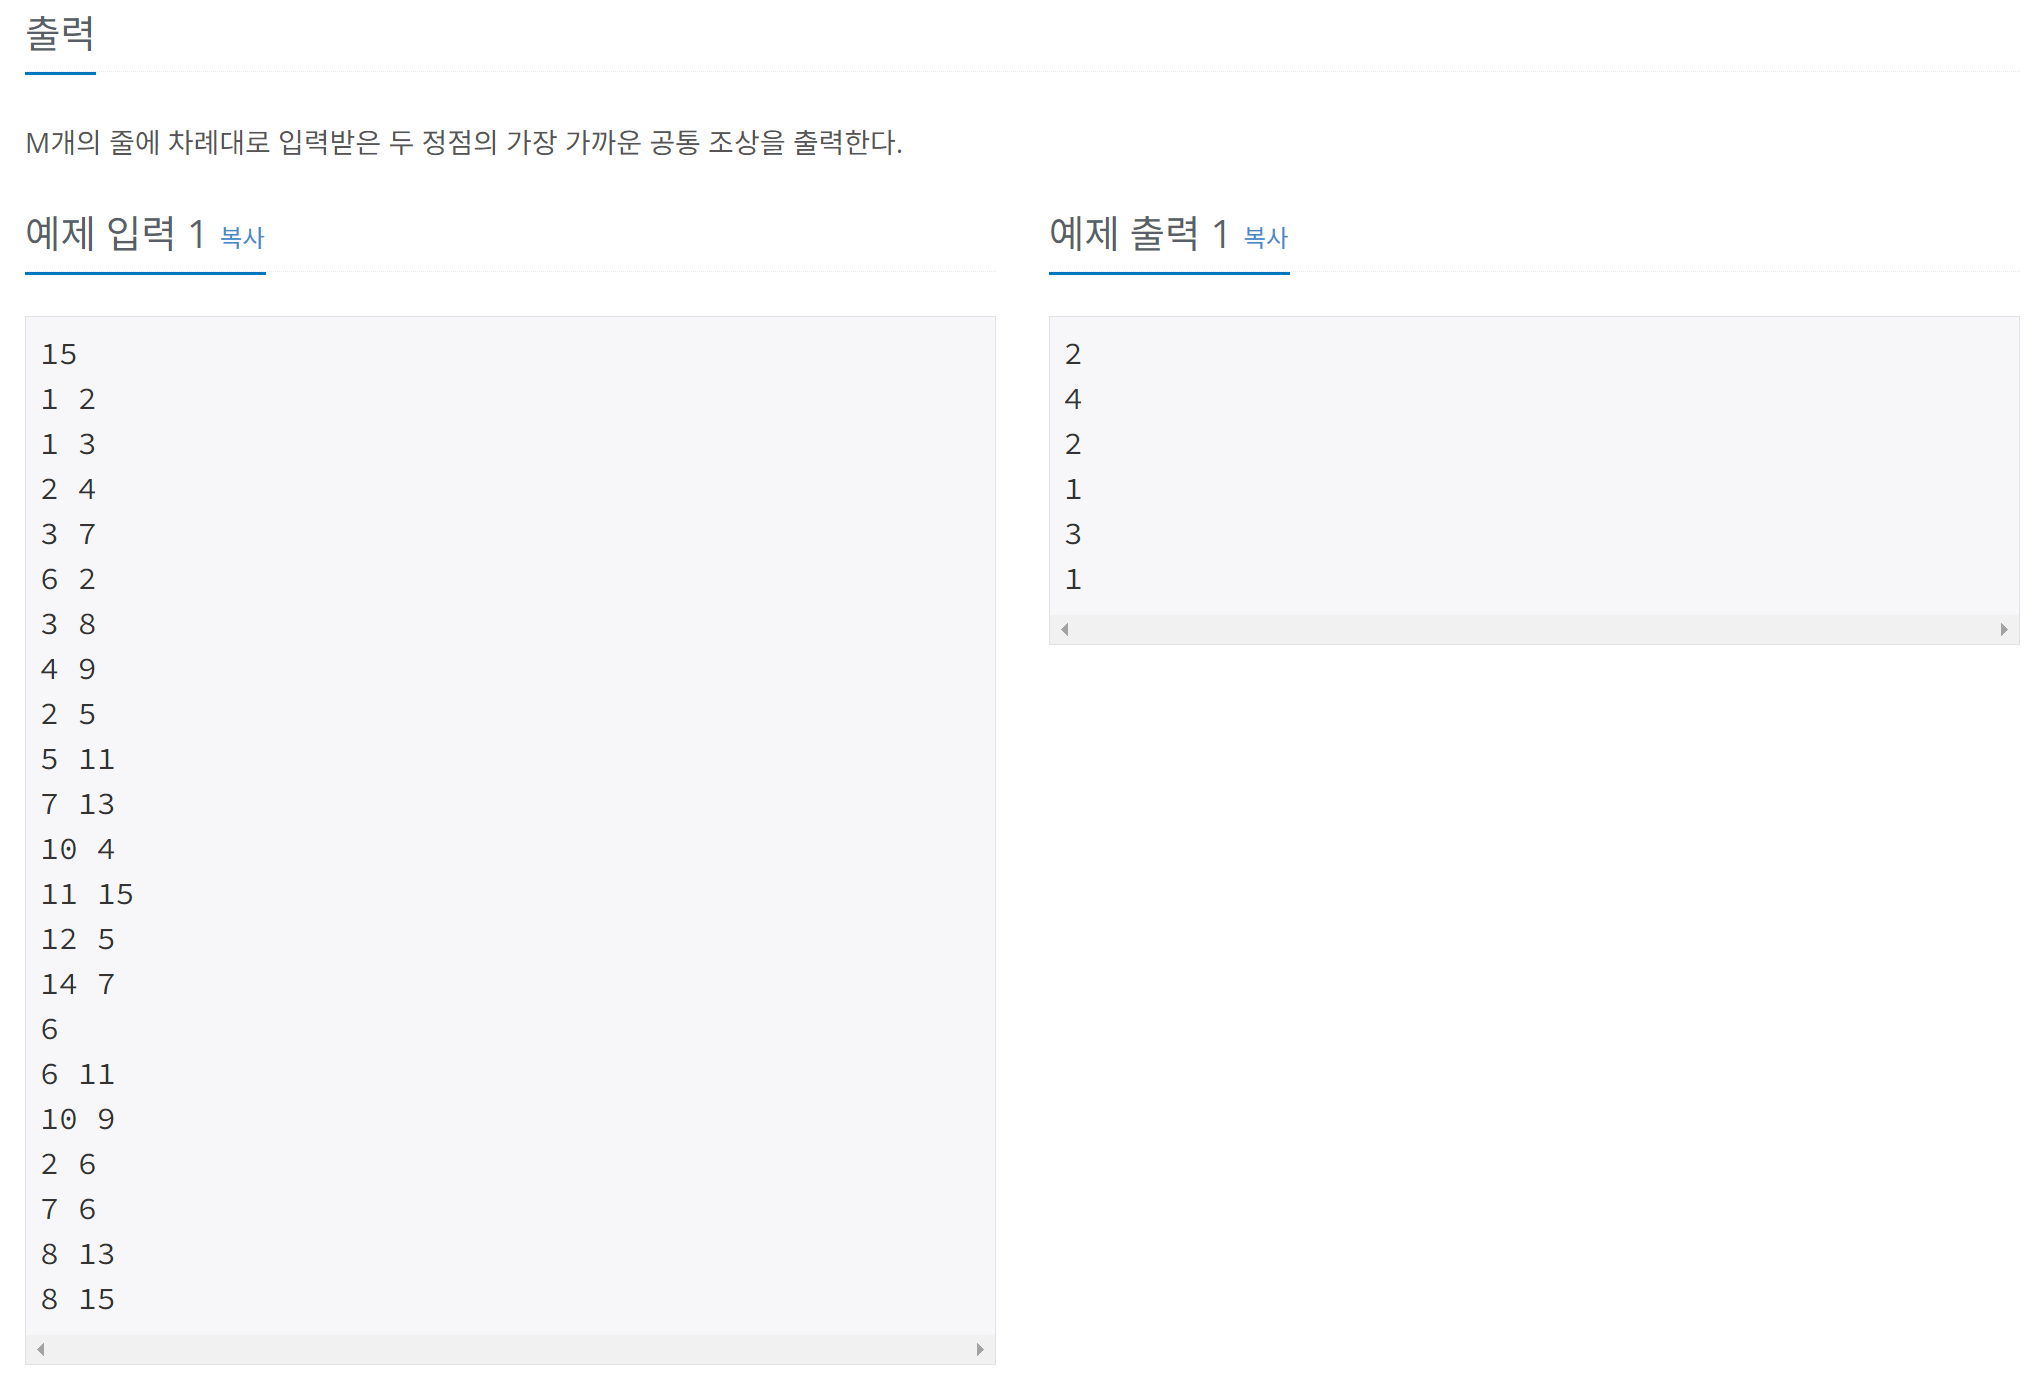

In [1]:
# 코드 작성
n = int(input())  # 노드의 개수
parent = [0] * (n + 1)  # 부모 노드 정보
d = [0] * (n + 1)  # 각 노드까지의 깊이
visited = [0] * (n + 1)  # 각 노드 방문 여부
tree = [[] for _ in range(n + 1)]  # 트리 정보 입력 받기

for _ in range(n - 1):
    a, b = map(int, input().split())
    tree[a].append(b)
    tree[b].append(a)
    
# 루트 노드부터 시작하여 깊이를 구하는 함수
def dfs(x, depth):      # x: 현재 노드, depth: 현재 노드의 깊이
    visited[x] = True   # 현재 노드 방문 처리
    d[x] = depth        # 현재 노드의 깊이 설정
    for i in tree[x]:   # 현재 노드와 연결된 다른 노드를 재귀적으로 방문
        if visited[i]:  # 이미 방문한 노드라면 건너뛰기
            continue 
        parent[i] = x   # 현재 노드를 부모 노드로 설정
        dfs(i, depth + 1)

# A와 B의 최소 공통 조상을 찾는 함수
def lca(a, b):
    # 깊이 맞추기
    while d[a] != d[b]:     # 두 노드의 깊이가 동일해질 때까지 반복
        if d[a] > d[b]:     # 노드 A의 깊이가 더 깊을 경우
            a = parent[a]   # 노드 A의 부모 노드로 이동
        else:               # 노드 B의 깊이가 더 깊을 경우
            b = parent[b]   # 노드 B의 부모 노드로 이동
            
    # 노드 A와 노드 B의 깊이가 동일해졌을 때
    while a != b:           # 두 노드가 서로 다를 경우
        a = parent[a]       # 노드 A의 부모 노드로 이동
        b = parent[b]       # 노드 B의 부모 노드로 이동
    
    return a                # 두 노드의 공통 부모 노드 반환, a == b

dfs(1, 0)                   # 루트 노드부터 시작하여 깊이를 구하는 함수 호출

m = int(input())            # 노드 쌍의 개수

for _ in range(m):
    a, b = map(int, input().split())
    print(lca(a, b))

2
4
2
1
3
1


2. 이분탐색으로 LCA 구하기 :O(log(depth))
    - 위에서 살펴본 선형 탐색 방법은 구현이 간단하나 트리의 구조에 따라 시간적 측면에서 매우 비효율적이다
    - 양쪽 다 크기 N인 트리에서 이분탐색을 사용하면 O(log(depth))만에 두 특정 점점의 LCA를 찾을 수 있음

##### 구현방법
- 부모노드를 나타내는 parent배열을 2차원으로 둔다
- Parent[x][k] = "x번 정점의 2^k번째 조상 노드의 번호"로 둔다
- 이는 x = 13일때 아래와 같이 표현된다

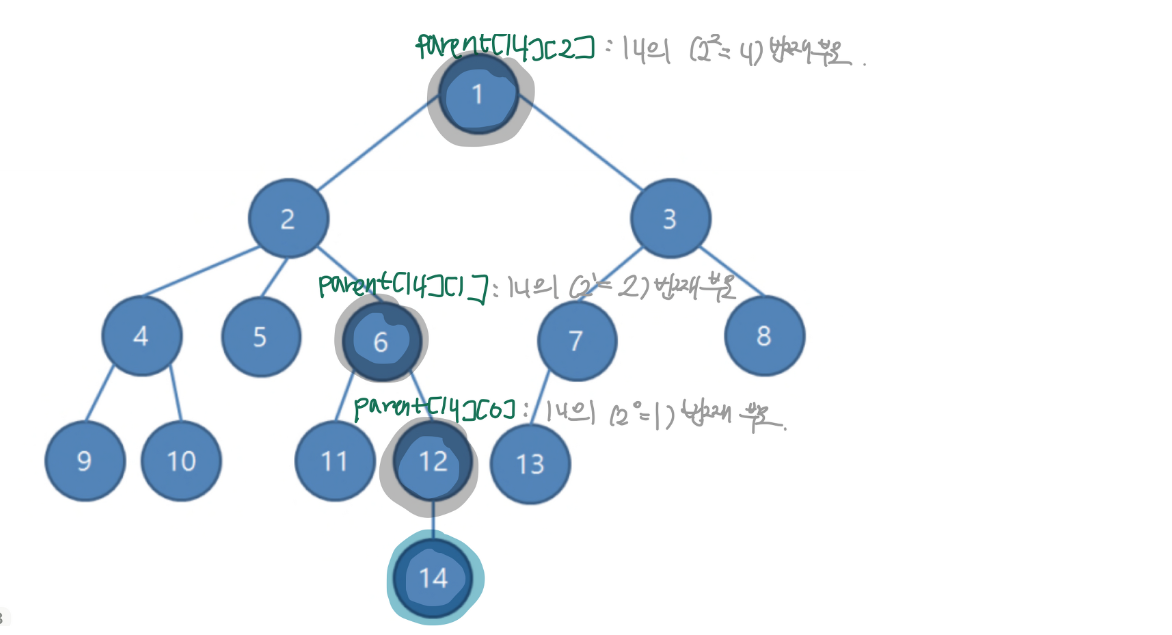

- DFS를 통해 root부터 트리 구성 시, 낮은 깊이의 노드를 반드시 먼저 탐색하므로 다음 식이 성립한다
- Parent[x][k] = Parent[Parent[x][k-1]][k-1]
- 이는 x = 13일때 아래와 같이 표현된다

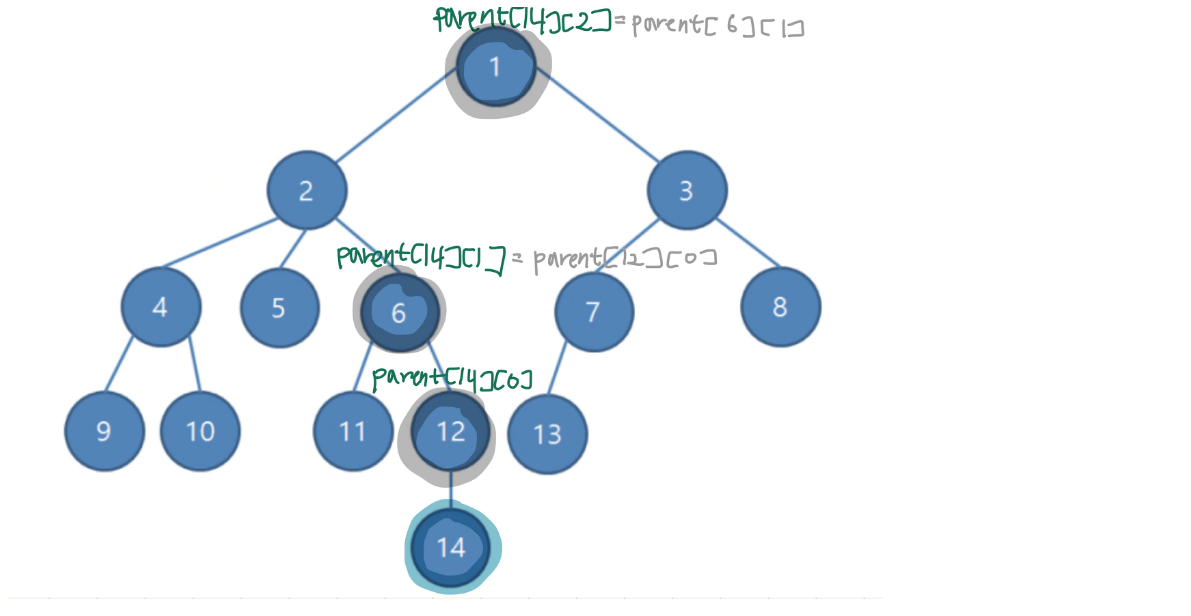

- 이 경우, 기존의 선형시간에 구하는 방법에서 부모 노드로 거슬러가는 과정을 2의 제곱수만큼 한 번에 건너뛸 수 있다.

In [7]:
# 코드 작성
length = 21 # 2^20 = 1,000,000

n = int(input()) # 노드의 개수
parent = [[0] * length for _ in range(n + 1)] # 부모 노드 정보
d = [0] * (n + 1) # 각 노드까지의 깊이
visited = [False] * (n + 1) # 각 노드 방문 여부
tree = [[] for _ in range(n + 1)] # 각 노드의 연결된 노드 정보

# 두 노드의 정보 입력 및 트리 정보 초기화
for _ in range(n - 1):
    a, b = map(int, input().split())
    tree[a].append(b)
    tree[b].append(a)
    
# 루트 노드부터 시작하여 깊이를 구하는 함수
def dfs(x, depth):
    visited[x] = True  # 방문 처리
    d[x] = depth       # 노드의 깊이 설정
    for node in tree[x]:    # 연결된 노드 정보 확인
        if visited[node]:   # 이미 처리된 노드라면 무시
            continue        
        parent[node][0] = x # 부모 노드 정보 기록
        dfs(node, depth + 1)
        
# 전체 부모 관계를 갱신하는 함수
def set_parent():
    dfs(1, 0) # 루트 노드는 1번 노드
    for i in range(1, length):
        for j in range(1, n + 1):
            # 각 노드의 2^i번째 부모 노드 정보 갱신
            parent[j][i] = parent[parent[j][i - 1]][i - 1]

# A와 B의 최소 공통 조상을 찾는 함수
def lca(a, b):
    # 문조건 b의 깊이가 더 깊도록 설정
    if d[a] > d[b]:
        a, b = b, a
        
    # a와 b의 깊이가 동일하도록 설정
    for i in range(length - 1, -1, -1):
        if d[b] - d[a] >= (2**i):
            b = parent[b][i]
            
    if a == b:
        return a  # 노드가 같다면 해당 노드가 최소 공통 조상
    
    # 부모가 같아질 때까지 반복적으로 부모 노드 확인
    for i in range(length - 1, -1, -1):
        if parent[a][i] != parent[b][i]:
            a = parent[a][i]
            b = parent[b][i]
            
    return parent[a][0]

set_parent() # 부모 관계 갱신

m = int(input()) # 노드 쌍의 개수
for _ in range(m):
    a, b = map(int, input().split())
    print(lca(a, b))

2
4
2
1
3
1
